# The `Signal` class

The `Signal` class is a container based on the `np.array` storing besides the samples as function of time also a sample frequency. The class has many usefull methods making the life of an acoustician a bit easier. 
Furthermore, because its based on the `np.array`, all operations you would normally perform on a `np.array` can be done on a `Signal` as well. 

In [2]:
from acoustic_toolbox import Signal
import numpy as np

%matplotlib inline
from IPython.display import Audio

## Creating an instance
A `Signal` takes two arguments, the first an array of samples, and the second a sample frequency.

In [3]:
s = Signal(np.random.randn(44100), fs=11025)

Alternatively, one of the alternative constructors can be used

In [4]:
s = Signal.from_wav("../../tests/data/aircraft_recording.wav")

## Attributes

An instance of `Signal` stores besides the instantaneous values also the sample frequency

In [5]:
s.fs

44100

The `Signal` class can handle multiple signals. Currently we have only one channel.

In [6]:
s.channels

1

The amount of samples in the signal can be retrieved in several ways. We can use the standard ways, `len(s)`, or `s.shape` but also the method `s.samples`

In [7]:
s.samples

1185408

## Play signal with IPython
The recording is of an aircraft flyover as you can hear.

In [9]:
Audio(data=s, rate=s.fs)

## Spectral analysis

Let's continue for now with analysing the recording.

We can start with looking at the spectrum. A narrowband power spectrum can be calculated using `s.power_spectrum()`

In [8]:
s.power_spectrum()

(array([0.00000000e+00, 3.72023810e-02, 7.44047619e-02, ...,
        2.20498884e+04, 2.20499256e+04, 2.20499628e+04], shape=(592704,)),
 array([3.7347339e-09, 6.8095609e-09, 6.2505685e-09, ..., 2.0638913e-14,
        6.1107667e-14, 1.3533500e-14], shape=(592704,), dtype=float32))

returning frequencies and powers. It's also possible to straightaway plot the power spectrum

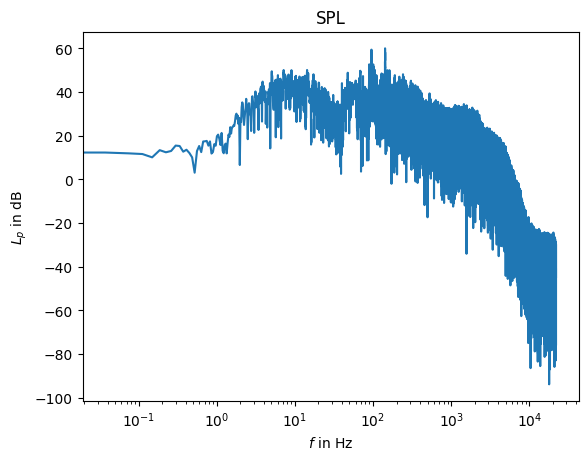

In [9]:
fig = s.plot_power_spectrum()

There are other types of spectra available, like for example the phase spectrum. Another popular figure is the spectrogram

In [10]:
# TODO: Not sure why this is not working
fig = s.spectrogram()

## Sound pressure level

The methods shown so far are quite common operations, not specific to acoustics alone. But, the `Signal` class has some more acoustics-specific methods as well. For example, we can calculate the sound pressure level as function of time using `s.levels()` or instead plot the values 

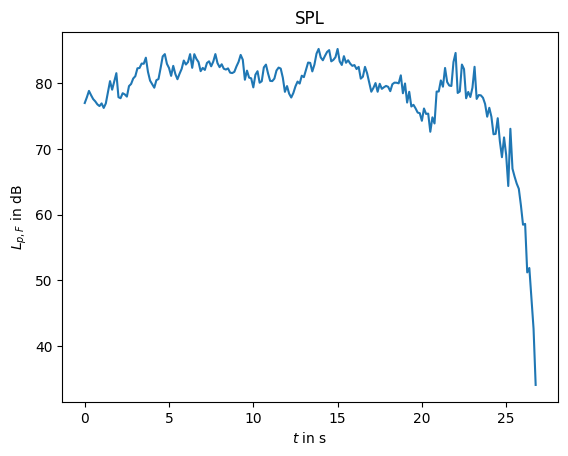

In [11]:
fig = s.plot_levels()

## Fractional octaves

The label is the channel number, using zero-based numbering as is common in Python. We can also calculate and plot 1/1-octaves with respectively `s.octaves()` and `s.plot_octaves()`.

10 10


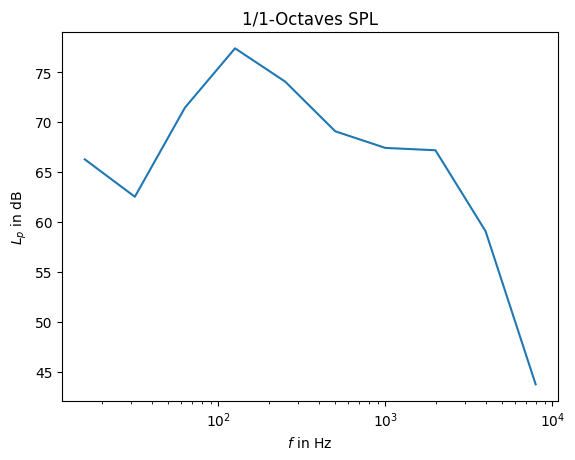

In [12]:
fig = s.plot_octaves()

Calculating or plotting 1/3-octaves is also possible.

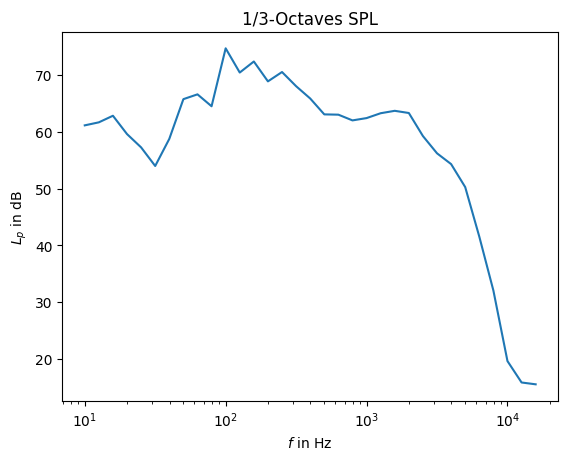

In [13]:
fig = s.plot_third_octaves()

## Frequency weighting

The `acoustics` package features frequency weighting in several ways. When having a signal like shown in this example, frequency weighting can be applied directly using the `weigh` method.


In [14]:
s.weigh("A")

Signal([-9.88824503e-03 -3.00674085e-02 -3.93263745e-02 ... -3.54659754e-06
 -2.65939622e-06 -1.65781997e-06])

This can be seen better when plotting in octaves.

10 10


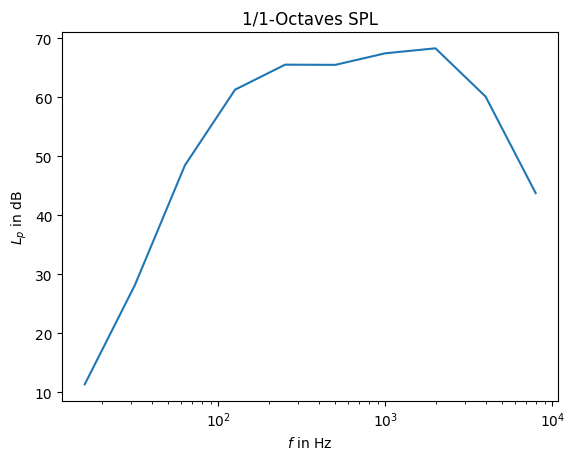

In [15]:
fig = s.weigh("A").plot_octaves()

## Descriptors

The signal class also features several descriptors, like e.g. $L_{eq}$.
Let's calculate as an example the A-weighted equivalent level over the event, i.e. $L_{A,eq}$.

In [16]:
s.weigh("A").leq()

np.float64(73.30089253219286)

This value is a bit below the unweighted $L_{Z,eq}$.

In [17]:
s.leq()

np.float32(80.84331)

We can verify the calculation by using a different method. Let's calculate 1/3-octave values first, and then add the weighting. The A-weighting is

In [18]:
from acoustic_toolbox.standards.iec_61672_1_2013 import WEIGHTING_VALUES

WEIGHTING_VALUES["A"]

array([-70.4, -63.4, -56.7, -50.5, -44.7, -39.4, -34.6, -30.2, -26.2,
       -22.5, -19.1, -16.1, -13.4, -10.9,  -8.6,  -6.6,  -4.8,  -3.2,
        -1.9,  -0.8,   0. ,   0.6,   1. ,   1.2,   1.3,   1.2,   1. ,
         0.5,  -0.1,  -1.1,  -2.5,  -4.3,  -6.6,  -9.3])

and the A-weighted $L_{A,eq}$ determined using this method is

In [19]:
from acoustic_toolbox.decibel import dbsum

frequences, third_octave_filtered_signals = s.third_octaves()
dbsum(
    third_octave_filtered_signals.leq()
    + WEIGHTING_VALUES["A"][: len(third_octave_filtered_signals)]
)

np.float64(73.42855324556353)

## Multichannel signal

The Signal container can store more then one channel


In [20]:
s2 = Signal([s, s, s], s.fs)

as we can see

In [21]:
s2.channels

3

Most methods still work when considering multichannel signals.

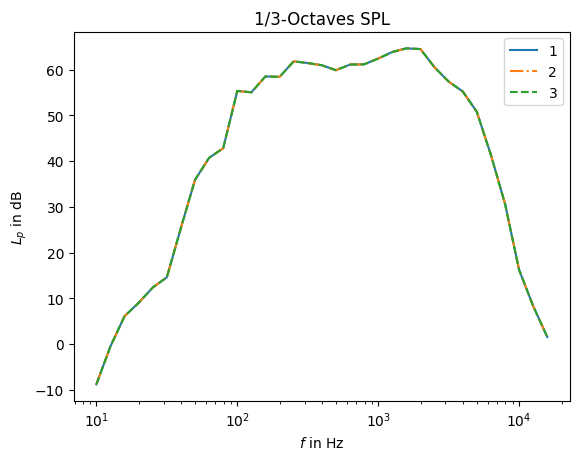

In [22]:
fig = s2.weigh("A").plot_third_octaves()

## Exporting to wav

Finally, a signal can be written to WAV format easily as well using `s.to_wav(filename)`. You might want to normalize your signal first though, so e.g. `s.normalize().to_wav(filename)`.